### Import CSV and plot

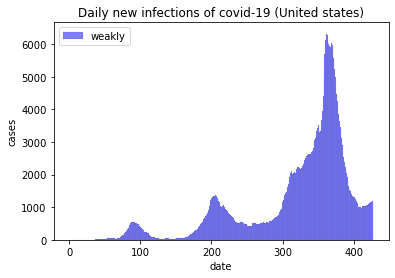

In [6]:
%matplotlib inline
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import matplotlib.cm as cm
import datetime
import pandas as pd
import time
import math
import line_fitted as lf

name = "japan_covid"

data = pd.read_csv(str(name)+".csv")
y = list(data['cases'])     #データをリストに格納する
date = list(data['date'])
x = [i for i in range(len(y))]
data['date'] = pd.to_datetime(data['date'], format='%Y-%m')
day = np.array(list(data['date']))

y = np.array(lf.weak(y))

y_japan = y

x = np.array([i for i in range(len(y))])

""" #緊急事態宣言等のポイント表示
point_day = []
for i in range(len(date)):
    if date[i] == '2020/4/7' or date[i] == '2020/4/16' or date[i]=='2020/5/25' or date[i]=='2020/7/20' or date[i]=='2021/1/8' or date[i]=='2020/12/28' or date[i]=='2020/11/1':
        point_day.append(i) """

point_day = np.array(point_day)
plt.title('Daily new infections of covid-19 (United states)')
plt.xlabel('date')
plt.ylabel('cases')
plt.bar(x, y, width=1, color='blue',edgecolor='black', alpha=0.5, linewidth=0.1,label ='weakly')
#plt.scatter(x[point_day], y[point_day])
plt.legend()
plt.show()

### adjust and calculate Gaussian fitting

In [8]:
y0 = y[:159]
y1 = y[159:257]
y2 = y[257:353]
y3 = y[353:]
pt_japan = [158,256,352]

gauss_ans = []

x0 = np.array([i for i in range(len(y0))])
#param_init0 = [1400,40,10]
#popt1,pcov0 = curve_fit(gauss_func, x0, y0, param_init0, maxfev=100000)
g0 = lf.line_fitted(x0, y0)
gauss_ans += list(g0)

x1 = np.array([i for i in range(len(y1))])
#param_init1 = [1400,40,10]
#popt1,pcov1 = curve_fit(gauss_func, x1, y1, param_init1, maxfev=100000)
g1 = lf.line_fitted(x1, y1)
gauss_ans += list(g1)

x2 = np.array([i for i in range(len(y2))])
#param_init2 = [2000,50,100]
#popt2,pcov2 = curve_fit(gauss_func, x2, y2, param_init2, maxfev=1000000)
g2 = lf.line_fitted(x2, y2)
gauss_ans += list(g2)

x3 = np.array([i for i in range(len(y3))])
#param_init3 = [500,15,10]
#popt3, pcov3 = curve_fit(gauss_func, x3, y3, param_init3, maxfev=1000000)
g3 = lf.line_fitted(x3, y3)
gauss_ans += list(g3)

gauss_ans_japan = gauss_ans

/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/noguchimakoto/Desktop/fitting_hist/line_fitted.py:18: RuntimeWarning: divide by zero encountered in log
  return a*x* np.exp( - (np.log(x) - myu)**2 / (2 * sigma**2))


### plot Gaussian fitting curvw

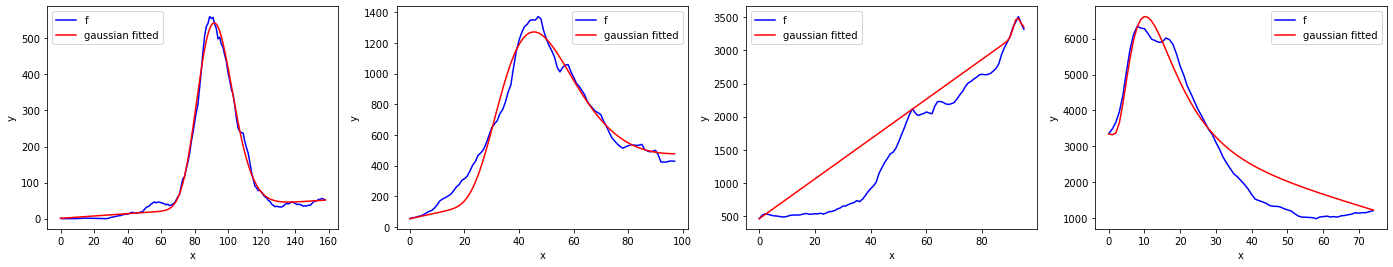

In [10]:
fig = plt.figure(figsize = (24,9))

plt.subplot2grid((2,4), (0,0))
plt.plot(x0, y0, 'b-', label='f')
plt.plot(x0, g0, 'r-', label='gaussian fitted')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.subplot2grid((2,4), (0,1))
plt.plot(x1, y1, 'b-', label='f')
plt.plot(x1, g1, 'r-', label='gaussian fitted')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.subplot2grid((2,4), (0,2))
plt.plot(x2, y2, 'b-', label='f')
plt.plot(x2, g2, 'r-', label='gaussian fitted')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.subplot2grid((2,4), (0,3))
plt.plot(x3, y3, 'b-', label='f')
plt.plot(x3, g3, 'r-', label='gaussian fitted')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()